In [ ]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
plt.ion()   # interactive mode
# shutil.rmtree('/content/ut-zap50k-images')

In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/SHOECGAN/ut-zap50k-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058592.265680.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058593.137771.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058593.382709.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.382712.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.382713.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058594.84280.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058597.104236.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058597.186729.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058601.173596.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and Athletic Shoes/PUMA/8058601.382726.jpg  
  inflating: ut-zap50k-images/Shoes/Sneakers and A

delete all noisy data

In [ ]:
import shutil
import os.path as Path
from os import path
remaining_types = ['Boots/Ankle', 'Boots/Knee High', 'Boots/Mid-Calf',
                   'Sandals/Flat', 'Shoes/Sneakers and Athletic Shoes', 'Shoes/Flats',
                   'Shoes/Heels', 'Shoes/Loafers',
                   'Shoes/Oxfords','Slippers/Slipper Flats']
path = r"/content/ut-zap50k-images"

for major_type in os.listdir(path):  
  for functional_type in os.listdir(path+'/'+major_type):
    if (major_type + '/' + functional_type) in remaining_types:
      print(functional_type + ' ' + 'V\n')
    else:
      print(functional_type + ' ' + 'X\n')
      shutil.rmtree(path+ '/' + major_type + '/' + functional_type)

for major_type in os.listdir(path):
  os.mkdir(path+ '/' + major_type + '/' + 'Train')
  os.mkdir(path+ '/' + major_type + '/' + 'Valid')
  os.mkdir(path+ '/' + major_type + '/' + 'Test')

Slipper Heels X

Slipper Flats V

Boot X

Loafers V

Boat Shoes X

Oxfords V

Firstwalker X

Flats V

Sneakers and Athletic Shoes V

Crib Shoes X

Clogs and Mules X

Heels V

Prewalker X

Mid-Calf V

Ankle V

Knee High V

Over the Knee X

Prewalker Boots X

Flat V

Athletic X

Heel X



In [ ]:
#getting the number of images in each major type, for splitting them each later to Train, Test and Valid.

num_of_picts={}
for major_type in os.listdir(path):
  count = 0
  for functional_type in os.listdir(path+'/'+major_type):
    for sub_func_type in os.listdir(path+'/'+major_type+'/'+functional_type):
      count += len([y for y in os.listdir(path+'/'+major_type+'/'+functional_type+'/'+ sub_func_type)])
  num_of_picts[major_type] = count
print(num_of_picts)

{'Slippers': 1259, 'Shoes': 27472, 'Boots': 12781, 'Sandals': 5601}


In [ ]:
#getting the number of pictures in each functional type for splitting each to 8:1:1

for major_type in os.listdir(path):
  count = 0
  for functional_type in os.listdir(path+'/'+major_type):
    if functional_type == 'Train' or functional_type == 'Test' or functional_type == 'Valid':
      continue    
    for sub_func_type in os.listdir(path+'/'+major_type+'/'+ functional_type):
      if sub_func_type == 'Train' or sub_func_type == 'Test' or sub_func_type == 'Valid':
        continue
      for subsub in os.listdir(path+'/'+major_type+'/'+ functional_type + '/' + sub_func_type):
        if not subsub.endswith('.jpg'):
          continue
        if count <= (num_of_picts[major_type] * 0.8):
          file = path+'/'+major_type+'/'+ functional_type + '/' + sub_func_type + '/' + subsub
          folder_name = path+ '/'+major_type + '/' + 'Train'
          if not os.path.isfile(path+ '/' + major_type + '/' + 'Train' + '/' + subsub):
            shutil.move(file, folder_name)
        elif count <= (num_of_picts[major_type] * 0.9):
          file = path+'/'+major_type+'/'+ functional_type + '/' + sub_func_type + '/' + subsub
          folder_name = path+'/'+major_type + '/' + 'Valid'
          if not os.path.isfile(path+ '/' + major_type  + '/' + 'Valid' + '/' + subsub):
            shutil.move(file, folder_name)
        else:
          file = path+'/'+major_type+'/'+ functional_type + '/' + sub_func_type + '/' + subsub
          folder_name = path+'/'+major_type + '/' + 'Test'
          shutil.move(file, folder_name)
        count+=1

In [ ]:
for major_type in os.listdir(path):
  for functional_type in os.listdir(path + '/' + major_type):
    if functional_type == 'Train' or functional_type == 'Test' or functional_type == 'Valid':
      continue
    for sub_func_type in os.listdir(path + '/' + major_type + '/' + functional_type):
      if sub_func_type != 'Train' and sub_func_type != 'Test' and sub_func_type != 'Valid':
        
        os.rmdir(path + '/' + major_type + '/' + functional_type+'/'+sub_func_type)
      else:
        os.remove(path + '/' + major_type + '/' + functional_type+'/'+sub_func_type)
    if functional_type != 'Train' and functional_type != 'Test' and functional_type != 'Valid':
      os.rmdir(path + '/' + major_type + '/' + functional_type)
      


In [ ]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

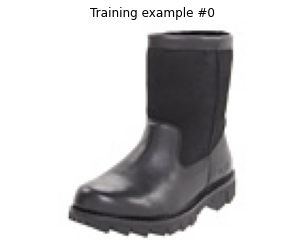

In [ ]:
import PIL

from PIL import Image
from numpy import asarray
  
# sample.png is the name of the image
# file and assuming that it is uploaded
# in the current directory or we need
# to give the path
image = Image.open('/content/ut-zap50k-images/Boots/Test/7200733.4746.jpg')

# # summarize some details about the image
# print(image.format, end='; ')
# print(image.size, end='; ')
# print(image.mode)

X_train = asarray([asarray(image),asarray(image)])

 


random_image = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[random_image])
plt.title(f"Training example #{random_image}")
plt.axis('off')
plt.show()

<h1>Loading one major type to data structure</h1>
Creating for each major type 3 numpy arrays, Train, Valid and Test, from each dir we have for them.

In [ ]:
majors_level = {}
for major_type in os.listdir(path):
  print(major_type)
  set_level = {}
  for data_set in os.listdir(path + '/' + major_type):
    imgs_list = []
    flag = 0
    for img in os.listdir(path + '/' + major_type + '/' + data_set):
      image = Image.open(path + '/' + major_type + '/' + data_set + '/' + img)
      try:
        imgs_list.append(asarray(image).reshape(1,102,136,3))
      except Exception as e:
        print(asarray(image).shape)
      if flag == 0:
        # print(image.format, end='; ')
        # print(image.size, end='; ')
        # print(image.mode)
        print(asarray(image).shape)
        flag = 1
      
    try:
      np_arr_imgs = np.concatenate( imgs_list, axis=0 )
      print(f"{data_set} shape: {np_arr_imgs.shape}")
      set_level[data_set] = np_arr_imgs
    except Exception as e:
      print("An exception occurred: ", e)
  majors_level[major_type] = set_level



Slippers
(102, 136, 3)
Valid shape: (126, 102, 136, 3)
(102, 136, 3)
Train shape: (1008, 102, 136, 3)
(102, 136, 3)
Test shape: (125, 102, 136, 3)
Shoes
(102, 136, 3)
Valid shape: (2747, 102, 136, 3)
(102, 136, 3)
Train shape: (21978, 102, 136, 3)
(102, 136, 3)
Test shape: (2747, 102, 136, 3)
Boots
(102, 136, 3)
Valid shape: (1278, 102, 136, 3)
(102, 136, 3)
(102, 136)
Train shape: (10224, 102, 136, 3)
(102, 136, 3)
Test shape: (1278, 102, 136, 3)
Sandals
(102, 136, 3)
Valid shape: (560, 102, 136, 3)
(102, 136, 3)
(102, 135, 3)
(102, 135, 3)
Train shape: (4479, 102, 136, 3)
(102, 136, 3)
Test shape: (560, 102, 136, 3)


<h1>The GAN net<h1>

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# batch size
batch_size = 64
# train set
train_data = majors_level['Shoes']['Train'] #datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
# dataloader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

In [ ]:
class Generator(nn.Module):
  def __init__(self, input_size, hidden_dim, output_size):
    super(Generator, self).__init__()
    self.z = input_size
    self.h = hidden_dim
    self.g = output_size
    self.leaky = nn.LeakyReLU(0.2)
    self.drop = nn.Dropout(0.3)
    self.fc0 = torch.nn.Linear(self.z, self.h)
    self.fc1 = torch.nn.Linear(self.h, 2 * self.h)
    self.fc2 = torch.nn.Linear(2 * self.h, 4 * self.h)
    self.fc3 = torch.nn.Linear(4 * self.h, self.g)
    # Declare layers for the model
    pass
    ######################

  def forward(self, x):
    # print("Generator forward")
    x = x.view(-1, self.z)
    x = self.drop(self.leaky(self.fc0(x)))
    x = self.drop(self.leaky(self.fc1(x))) 
    x = self.drop(self.leaky(self.fc2(x))) 
         
    # Forward pass through the network 
    out = torch.tanh(self.fc3(x))
    ######################
    return out

In [ ]:
# generator hyper parameters
latent_vector_size = 10000#100
first_hidden_size = 32
output_image_size = 136 * 102 * 3 # train_data.data[0].shape[0] * train_data.data[0].shape[1] * 3 #28*28=784

# creates a generator
generator = Generator(latent_vector_size, first_hidden_size, output_image_size)

In [ ]:
def create_latent_batch_vectors(batch_size, latent_vector_size, device):
  '''
  The function creates a random batch of latent vectors with random values 
  distributed uniformly between -1 and 1. 
  Finally, it moves the tensor to the given ```device``` (cpu or gpu).
  The output should have a shape of [batch_size, latent_vector_size].
  '''
  
  outputs = []
  for i in range(batch_size):
     outputs.append(torch.FloatTensor(1, latent_vector_size).uniform_(-1.0, 1.0))
  z = torch.cat(outputs, dim=1)
  return z.to(device)

In [ ]:
class Discriminator(nn.Module):
  def __init__(self, input_size, hidden_dim, output_size):
    super(Discriminator, self).__init__()
    self.z = input_size
    self.h = hidden_dim
    self.g = output_size
    self.leaky = nn.LeakyReLU(0.2)
    self.drop = nn.Dropout(0.3)
    self.fc0 = torch.nn.Linear(self.z, 4 * self.h)
    self.fc1 = torch.nn.Linear(4 * self.h, 2 * self.h)
    self.fc2 = torch.nn.Linear(2 * self.h, self.h)
    self.fc3 = torch.nn.Linear(self.h, self.g)
    # Declare layers for the model
    pass
    ######################
        
        
  def forward(self, x):
    x = x.view(-1, self.z)
    
    x = self.drop(self.leaky(self.fc0(x)))
    x = self.drop(self.leaky(self.fc1(x))) 
    x = self.drop(self.leaky(self.fc2(x)))
         
    # Forward pass through the network
    out = torch.sigmoid(self.fc3(x)) 
    ######################
    return out

In [ ]:
# discriminator hyper parameters
input_units = 136 * 102 * 3 #train_data.data[0].shape[0] * train_data.data[0].shape[1] #28*28=784
last_hidden_size = 32
output_classification_size = 1

# creates a generator
discriminator = Discriminator(input_units, last_hidden_size, output_classification_size)

In [ ]:
def create_labels(batch_size, device, real_data=True, for_discriminator=True):
  '''
  The function returns a batch_size-tensor with the correct labels.
  It creates labels according to the ```real_data``` and ```for_discriminator``` parameters.
  ```real_data``` - True if the batch images are real, and False for fake images
  ```for_discriminator``` - True if the labels should be created for the discriminator loss,
                            and False for the generator loss (False)
  If ```for_discriminator``` is set to True, it returns labels with smoothing,
  otherwise, it creates labels for the generator without smoothing.
  Finally, it moves the label tensors to the specified ```device```
  '''
  if real_data:
    if not for_discriminator:
      res = torch.ones(batch_size)
    else:
      res = torch.tensor([0.9]*batch_size)
  else:
    res = torch.zeros(batch_size)
   
  return res.to(device)

In [ ]:
def gan_loss(discriminator_preds, labels):
    criterion = nn.BCELoss()
    loss = criterion(discriminator_preds.squeeze(), labels)
    return loss

In [ ]:
import math
import torchvision
def train_gan(generator, discriminator, train_loader, lr = 0.002,
              latent_vector_size=100, nepochs=100, print_freq=400, device="cuda"):
  '''
  The function trains a gan model.
  '''
  print("train_gan")
  # move models to device
  discriminator = discriminator.to(device)
  generator = generator.to(device)

  # Create optimizers for the discriminator and generator
  #   each optimizes different model
  d_optimizer = optim.Adam(discriminator.parameters(), lr)
  g_optimizer = optim.Adam(generator.parameters(), lr)

  # Track loss history
  losses = []

  # Create latent vectors that are held constant throughout training
  # This allows us to check the generator performance during training
  fixed_latent_batch = create_latent_batch_vectors(18, latent_vector_size, device)
  fixed_samples = []
  
  # strat train loop
  for epoch in range(nepochs):
      # set both networks to train mode
      discriminator.train()
      generator.train()
      
      for batch_i, (real_images) in enumerate(train_loader):
          real_images = real_images.float()
          # rescale images before training
          real_images = (real_images * 2 - 1).to(device)

          # get batch size
          batch_size = real_images.size(0)
 
          ######### A. TRAIN THE DISCRIMINATOR #########
          d_optimizer.zero_grad()
          # 1. Compute the discriminator loss on real images
          discriminator_loss_on_real_images = gan_loss(discriminator(real_images) ,create_labels(batch_size, device, real_data=True, for_discriminator=True))
          
                 
          # 2. Generate fake images using the generator (use ```create_latent_batch_vectors```)
          fakes = create_latent_batch_vectors(batch_size, latent_vector_size=100, device="cuda")
          second = discriminator(generator(fakes))
          # 3. Compute the discriminator loss on fake images        
          discriminator_loss_on_fakes = gan_loss(second, create_labels(batch_size, device, real_data=False, for_discriminator=True))
          # 4. Calculate discriminator total loss and do backprop
          discriminator_loss = discriminator_loss_on_real_images + discriminator_loss_on_fakes
          discriminator_loss.backward()
          #loss_value = loss.cpu().data.item()
          ######################
          d_optimizer.step()
          
          ######### B. TRAIN THE GENERATOR #########
          
          g_optimizer.zero_grad()
          ######################
          ### YOUR CODE HERE ###
          ######################
          # 1. Generate fake images
          fakes = create_latent_batch_vectors(batch_size, latent_vector_size=100, device="cuda")


          # 2. Compute the discriminator loss on them but with flipped labels.
          generator_loss = gan_loss(discriminator(generator(fakes)),
                   create_labels(batch_size, device, real_data=True, for_discriminator=False))#lie to discriminator
          # 3. perform backprop
          generator_loss.backward()
          ######################
          g_optimizer.step()

          # Print some loss stats
          if batch_i % print_freq == 0:
              # print discriminator and generator loss
              print(f'Epoch {epoch}, Batch {batch_i}, Disc_loss: {discriminator_loss.item()}, Gen_loss: {generator_loss.item()}')
      # keep track of losses
      losses.append((discriminator_loss.item(), generator_loss.item()))

      # generate and save fixed sample for performance evaluation
      generator.eval()
      fixed_samples.append(generator(fixed_latent_batch))

  return losses, fixed_samples

In [ ]:
# hyperparmeters
nepochs = 25 # change to 50 when you think your implementation is correct
lr = 0.0002
latent_vector_size = 100

In [ ]:
# create new generator and discriminator models
generator = Generator(latent_vector_size, first_hidden_size, output_image_size)
discriminator = Discriminator(input_units, last_hidden_size, output_classification_size)

# run the training process
loss_history,fixed_samples = train_gan(generator, discriminator, train_loader, lr=lr,
          latent_vector_size=latent_vector_size, nepochs=nepochs)

train_gan
Epoch 0, Batch 0, Disc_loss: 22.385967254638672, Gen_loss: 0.6305966377258301
Epoch 1, Batch 0, Disc_loss: 13.226324081420898, Gen_loss: 0.202048197388649
Epoch 2, Batch 0, Disc_loss: 11.988199234008789, Gen_loss: 0.2188962996006012
Epoch 3, Batch 0, Disc_loss: 11.266341209411621, Gen_loss: 0.3407313823699951
Epoch 4, Batch 0, Disc_loss: 12.148248672485352, Gen_loss: 0.42048871517181396
Epoch 5, Batch 0, Disc_loss: 10.947829246520996, Gen_loss: 0.506648600101471
Epoch 6, Batch 0, Disc_loss: 10.855263710021973, Gen_loss: 0.5406227111816406
Epoch 7, Batch 0, Disc_loss: 10.780634880065918, Gen_loss: 0.665650486946106
Epoch 8, Batch 0, Disc_loss: 10.652587890625, Gen_loss: 0.7764455080032349
Epoch 9, Batch 0, Disc_loss: 10.550047874450684, Gen_loss: 0.8826788663864136
Epoch 10, Batch 0, Disc_loss: 10.550074577331543, Gen_loss: 0.8685662746429443
Epoch 11, Batch 0, Disc_loss: 10.477602005004883, Gen_loss: 0.9505327939987183
Epoch 12, Batch 0, Disc_loss: 10.56174373626709, Gen_loss

In [ ]:

 # #save models to drive/disk
torch.save(generator, "generator.pth")
torch.save(discriminator, "discriminator.pth")
torch.save(loss_history, "loss_history.pth")

In [ ]:
# #load model
generator = torch.load("generator.pth")
discriminator = torch.load("discriminator.pth")
loss_history = torch.load("loss_history.pth")

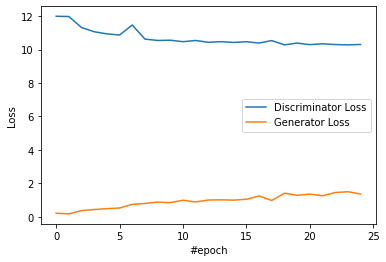

In [ ]:
loss_history = np.array(loss_history)
plt.plot(loss_history.T[0], label='Discriminator Loss')
plt.plot(loss_history.T[1], label='Generator Loss')
plt.ylabel("Loss")
plt.xlabel("#epoch")
plt.legend()

In [ ]:
def fixed_samples_grid(fixed_samples, nepochs):
  rows = int(nepochs / 5)
  cols = 3
  fig, axes = plt.subplots(figsize=(7,7), nrows=rows, ncols=cols, sharex=True, sharey=True)
  for ax_row, sample in zip(axes, fixed_samples[::int(len(fixed_samples)/rows)]):
    for ax, img in zip(ax_row, sample[::int(len(sample)/cols)]):
      img = img.cpu().detach().numpy()
      ax.imshow(img.reshape((102,136,3)), cmap='Greys_r')
      ax.xaxis.set_visible(False)
      ax.yaxis.set_visible(False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

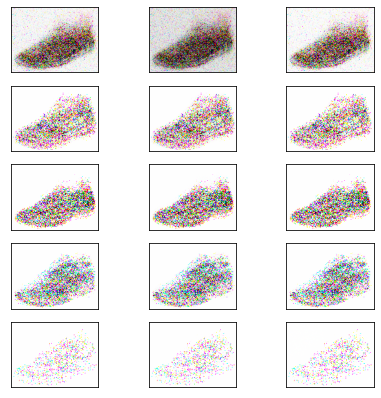

In [ ]:
fixed_samples_grid(fixed_samples, nepochs)